In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [11]:
def width2var(w):
    var = (w/2)**2
    return var

In [12]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (15))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [13]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)

(53, 3)
[[ 97.23330891 373.48137665  27.4844237 ]
 [113.84482829 357.1427632   25.89921689]
 [ 73.01145286 498.49337351  19.64121057]
 [158.38663034 404.79492898  25.27065651]
 [133.66727061 372.72044882  26.16402045]
 [105.22587716 608.50991497  25.75821646]
 [160.06546801 473.36478092  22.18771269]
 [123.59049686 349.16973783  26.84942717]
 [476.62833977 435.85408827  37.28531038]
 [410.04067356 485.24414882  39.74575836]
 [563.95155512 469.34444076  37.05782172]
 [350.62380764 448.48990249  34.67167433]
 [423.26300709 584.30533624  33.05012803]
 [447.68270973 506.41086286  31.50952781]
 [441.47298842 497.52152149  38.87649832]
 [545.52537785 415.01923242  34.93537637]
 [516.3399986  481.02828537  35.2528464 ]
 [469.25068197 418.16900263  37.26742009]
 [456.37439723 398.68902962  35.70872404]
 [503.38067737 469.82101692  32.36188175]
 [533.79138274 405.22552381  35.61243568]
 [510.12731303 521.82384569  30.19064286]
 [427.00782148 447.5838338   34.94621857]
 [396.3235941  186.0683881

(874, 620, 3)


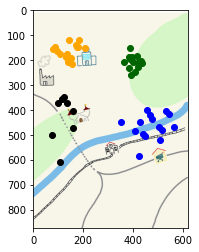

In [14]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

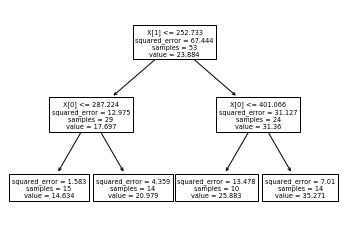

In [16]:
tree.plot_tree(model)
None

In [17]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(874, 620, 3)


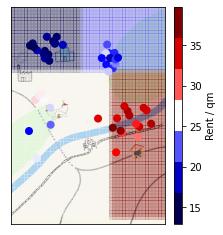

In [18]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None